# Mercedes CCLASS Dataset Using H2O.ai
**By: Amr Ezzat**

## IMPORT RESOURCES

In [20]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,21 days 16 hours 23 mins
H2O_cluster_timezone:,Asia/Dubai
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_home_oyiep6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,778 Mb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [21]:
# Fetching dataset 
cclass_ds = h2o.import_file('/Users/home/Documents/Downloads/cclass.csv') 

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [22]:
# Checking the dataset was imported successfully 
cclass_ds

model,year,price,transmission,mileage,fuelType,engineSize
C Class,2020,30495,Automatic,1200,Diesel,2
C Class,2020,29989,Automatic,1000,Petrol,1.5
C Class,2020,37899,Automatic,500,Diesel,2
C Class,2019,30399,Automatic,5000,Diesel,2
C Class,2019,29899,Automatic,4500,Diesel,2
C Class,2020,30999,Automatic,1000,Diesel,2
C Class,2020,35999,Automatic,500,Diesel,2
C Class,2019,37990,Automatic,1412,Petrol,3
C Class,2019,28990,Automatic,3569,Diesel,2
C Class,2019,28990,Automatic,3635,Diesel,2


In [23]:
# Checking Number of columns and rows are correct and no missing data
cclass_ds.describe() 

Rows:3899
Cols:7




,model,year,price,transmission,mileage,fuelType,engineSize
type,enum,int,int,enum,int,enum,real
mins,,1991.0,1290.0,,1.0,,0.0
mean,,2017.3385483457296,23674.28699666581,,22395.709156193894,,2.03739420364196
maxs,,2020.0,88995.0,,173000.0,,6.2
sigma,,2.2134156573379795,8960.218218423464,,22630.438425876877,,0.4877693241414137
zeros,,0,0,,0,,1
missing,0,0,0,0,0,0,0
0,C Class,2020.0,30495.0,Automatic,1200.0,Diesel,2.0
1,C Class,2020.0,29989.0,Automatic,1000.0,Petrol,1.5
2,C Class,2020.0,37899.0,Automatic,500.0,Diesel,2.0


## TRAIN TEST SPLIT

In [24]:
# Arrange data (Remove'price', set 'price' as the value I 
# want to predict)
y = "price"
x = cclass_ds.columns
x.remove(y)

In [25]:
# Splitting data 80% training data 20% test data
c_train,c_test= cclass_ds.split_frame(ratios=[.8],seed = 1)

In [26]:
# Checking the split was done properly
c_train.describe()

Rows:3137
Cols:7




,model,year,price,transmission,mileage,fuelType,engineSize
type,enum,int,int,enum,int,enum,real
mins,,1991.0,1290.0,,1.0,,0.0
mean,,2017.3560726809053,23728.61204972904,,22252.40261396238,,2.03391775581766
maxs,,2020.0,69950.0,,170000.0,,6.2
sigma,,2.1996395529912163,8879.276845878856,,22797.46941216005,,0.4803309707358283
zeros,,0,0,,0,,1
missing,0,0,0,0,0,0,0
0,C Class,2020.0,30495.0,Automatic,1200.0,Diesel,2.0
1,C Class,2020.0,29989.0,Automatic,1000.0,Petrol,1.5
2,C Class,2019.0,30399.0,Automatic,5000.0,Diesel,2.0


## H2O.ai

In [27]:
aml = H2OAutoML(max_runtime_secs = 3600, seed = 45, verbosity="info", exclude_algos = ['StackedEnsemble'], sort_metric = "MAE")
aml.train(x=x, y=y, training_frame=c_train)

AutoML progress: |
18:29:52.750: Project: AutoML_20210501_182952750
18:29:52.750: Setting stopping tolerance adaptively based on the training frame: 0.017854296416882943
18:29:52.750: Build control seed: 45
18:29:52.751: training frame: Frame key: automl_training_py_840_sid_9377    cols: 7    rows: 3137  chunks: 16    size: 61771  checksum: 2246479665010013599
18:29:52.751: validation frame: NULL
18:29:52.751: leaderboard frame: NULL
18:29:52.751: blending frame: NULL
18:29:52.752: response column: price
18:29:52.752: fold column: null
18:29:52.752: weights column: null
18:29:52.755: Loading execution steps: [{XGBoost : defaults}, {GLM : defaults}, {DRF : [def_1]}, {GBM : defaults}, {DeepLearning : defaults}, {DRF : [XRT]}, {XGBoost : grids}, {GBM : grids}, {DeepLearning : grids}, {GBM : [lr_annealing]}, {XGBoost : [lr_search]}, {StackedEnsemble : defaults}]
18:29:52.757: Disabling Algo: StackedEnsemble as requested by the user.
18:29:52.757: AutoML job created: 2021.05.01 18:29:52.750

## VISUAL RESULT 

In [28]:
# Leaderboard
lb = aml.leaderboard
lb.head()

model_id,mae,mean_residual_deviance,rmse,mse,rmsle
XGBoost_grid__1_AutoML_20210501_182952_model_9,1997.26,7.23683e+06,2690.14,7.23683e+06,0.122217
GBM_2_AutoML_20210501_182952,2012.06,7.31265e+06,2704.19,7.31265e+06,nan
GBM_grid__1_AutoML_20210501_182952_model_4,2012.6,7.43472e+06,2726.67,7.43472e+06,0.122808
GBM_1_AutoML_20210501_182952,2015.56,7.35933e+06,2712.81,7.35933e+06,0.123894
GBM_4_AutoML_20210501_182952,2015.6,7.3697e+06,2714.72,7.3697e+06,0.127647
GBM_3_AutoML_20210501_182952,2016.14,7.37292e+06,2715.31,7.37292e+06,nan
GBM_grid__1_AutoML_20210501_182952_model_9,2017.16,7.47134e+06,2733.37,7.47134e+06,nan
XGBoost_3_AutoML_20210501_182952,2026.05,7.34712e+06,2710.56,7.34712e+06,nan
XGBoost_grid__1_AutoML_20210501_182952_model_19,2027.23,7.4776e+06,2734.52,7.4776e+06,0.138646
XGBoost_grid__1_AutoML_20210501_182952_model_17,2027.4,7.36742e+06,2714.3,7.36742e+06,0.124612


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mae,mean_residual_deviance,rmse,mse,rmsle,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid__1_AutoML_20210501_182952_model_9,1997.26,7.23683e+06,2690.14,7.23683e+06,0.122217,248,0.010899,XGBoost
GBM_2_AutoML_20210501_182952,2012.06,7.31265e+06,2704.19,7.31265e+06,nan,110,0.01573,GBM
GBM_grid__1_AutoML_20210501_182952_model_4,2012.6,7.43472e+06,2726.67,7.43472e+06,0.122808,146,0.007079,GBM
GBM_1_AutoML_20210501_182952,2015.56,7.35933e+06,2712.81,7.35933e+06,0.123894,124,0.007745,GBM
GBM_4_AutoML_20210501_182952,2015.6,7.3697e+06,2714.72,7.3697e+06,0.127647,158,0.008757,GBM
GBM_3_AutoML_20210501_182952,2016.14,7.37292e+06,2715.31,7.37292e+06,nan,119,0.008211,GBM
GBM_grid__1_AutoML_20210501_182952_model_9,2017.16,7.47134e+06,2733.37,7.47134e+06,nan,124,0.008533,GBM
XGBoost_3_AutoML_20210501_182952,2026.05,7.34712e+06,2710.56,7.34712e+06,nan,133,0.000852,XGBoost
XGBoost_grid__1_AutoML_20210501_182952_model_19,2027.23,7.4776e+06,2734.52,7.4776e+06,0.138646,149,0.001714,XGBoost
XGBoost_grid__1_AutoML_20210501_182952_model_17,2027.4,7.36742e+06,2714.3,7.36742e+06,0.124612,86,0.000896,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

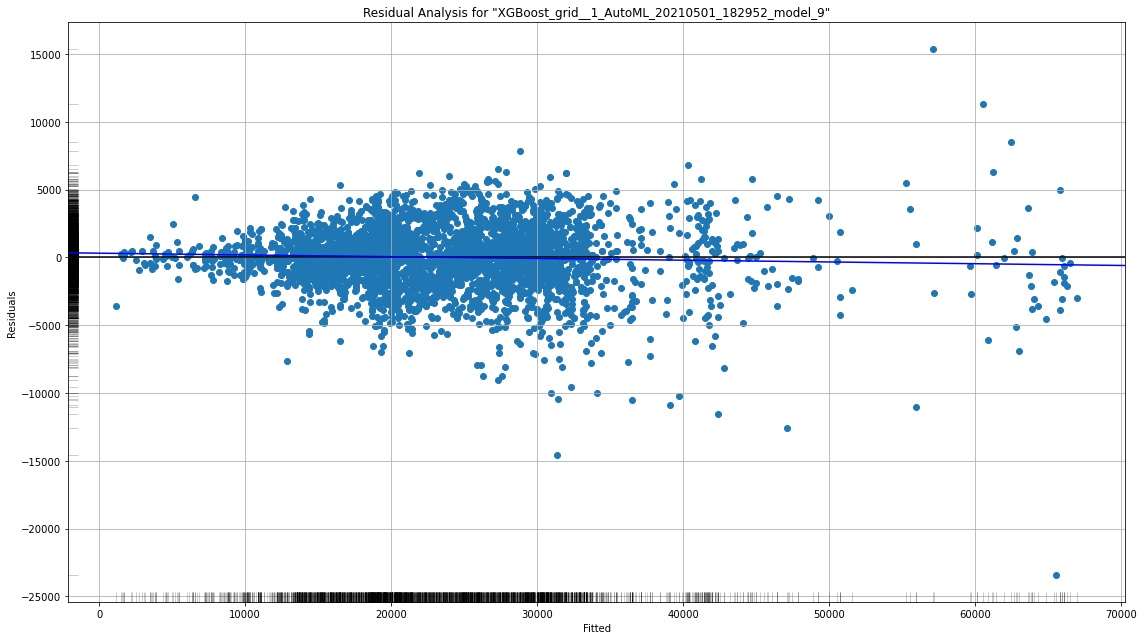

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

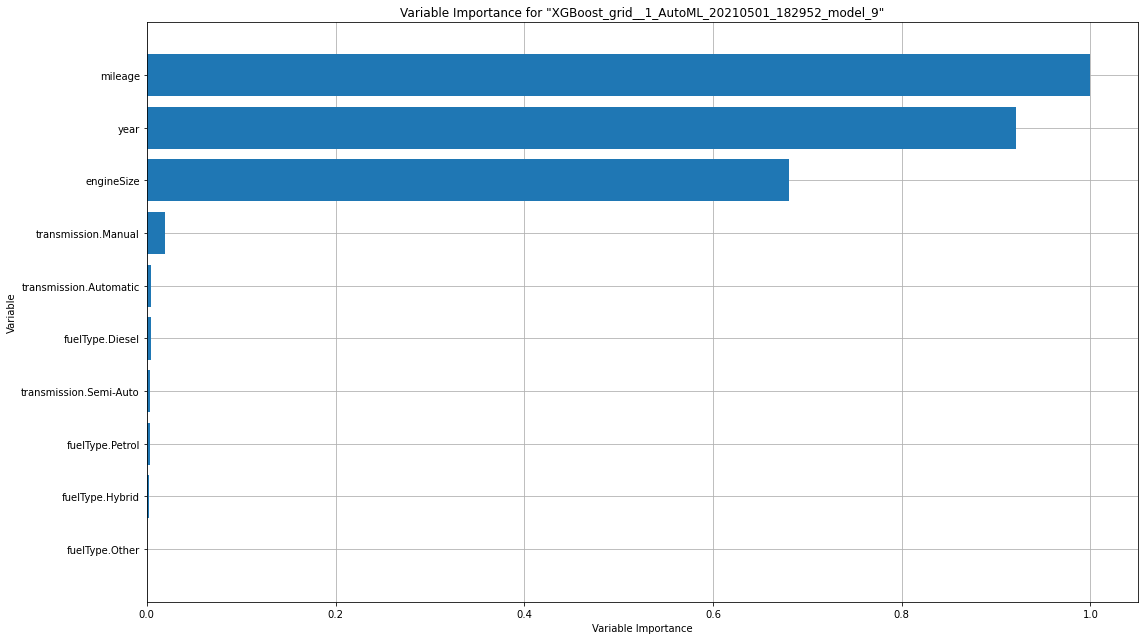

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

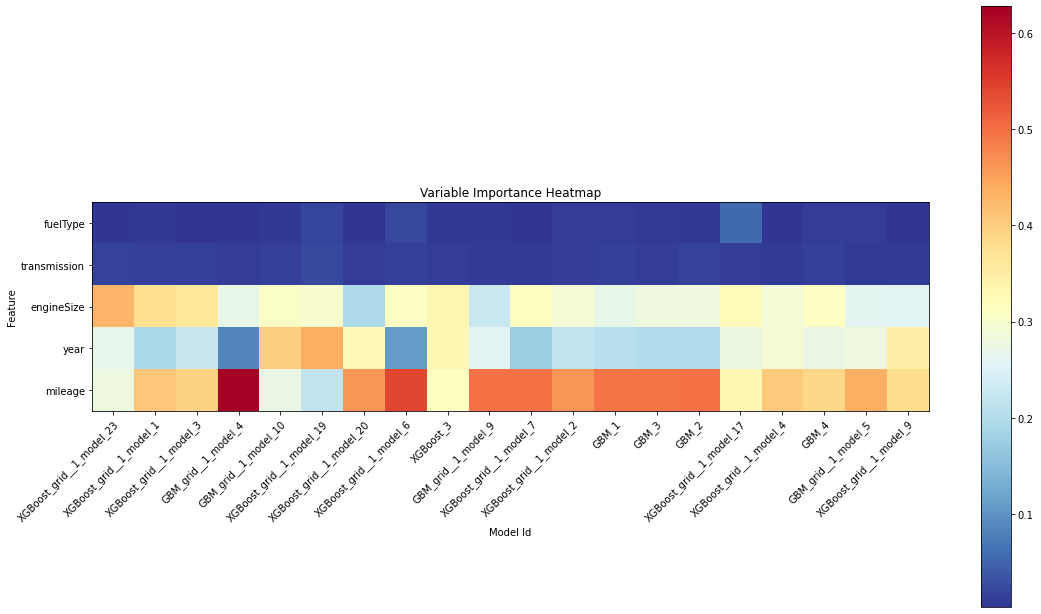

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

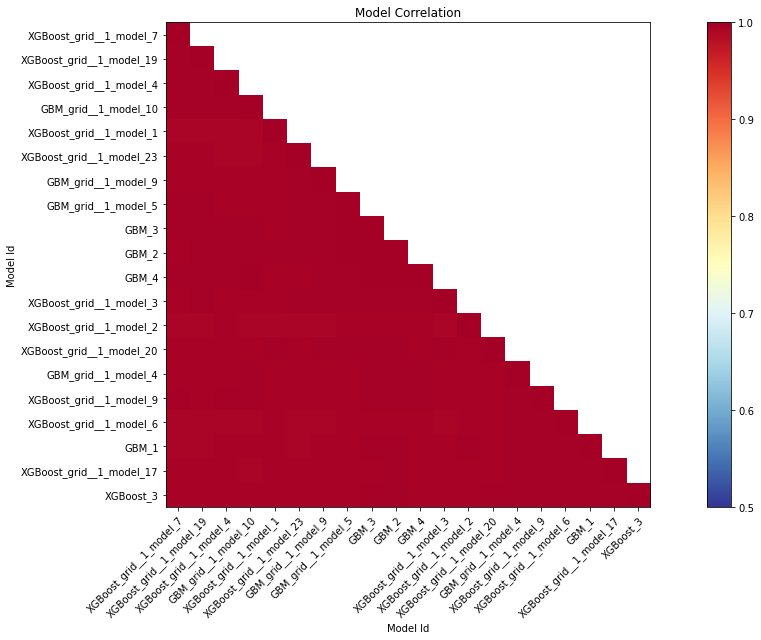

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

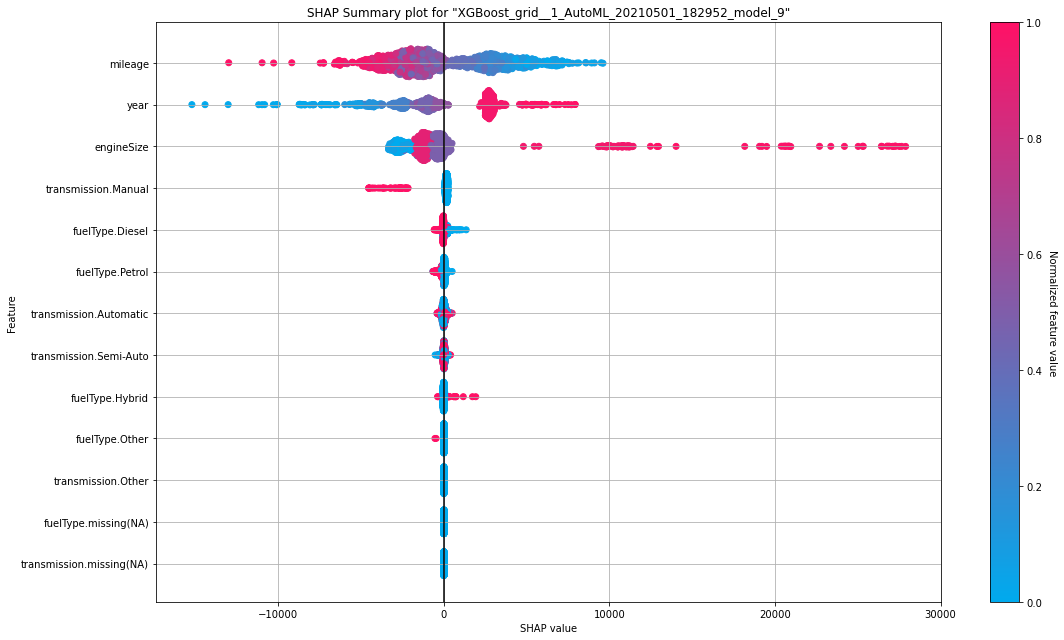

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

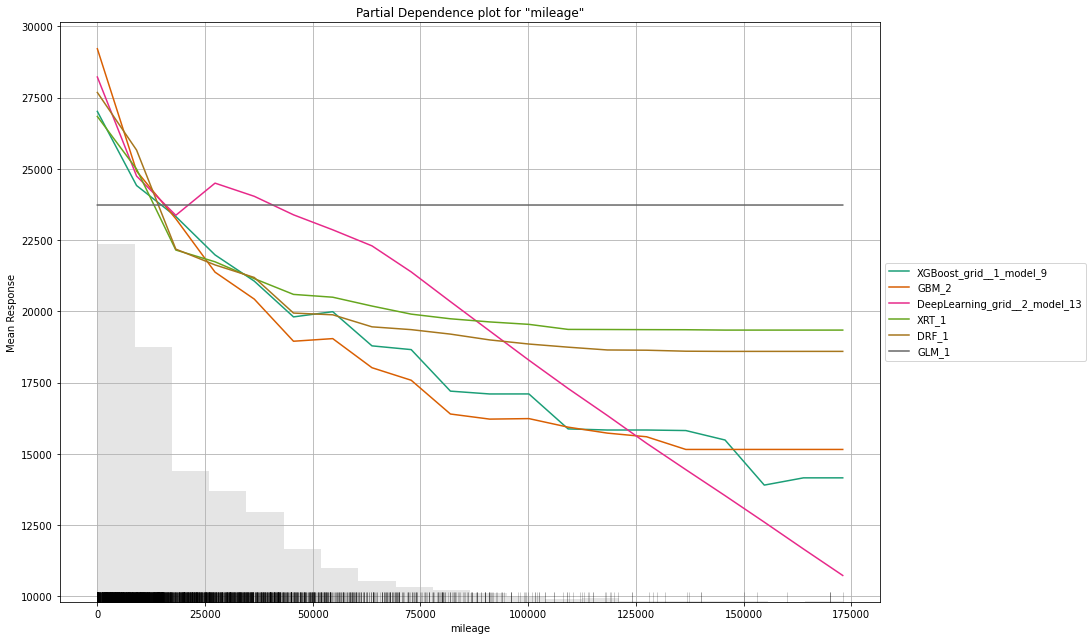

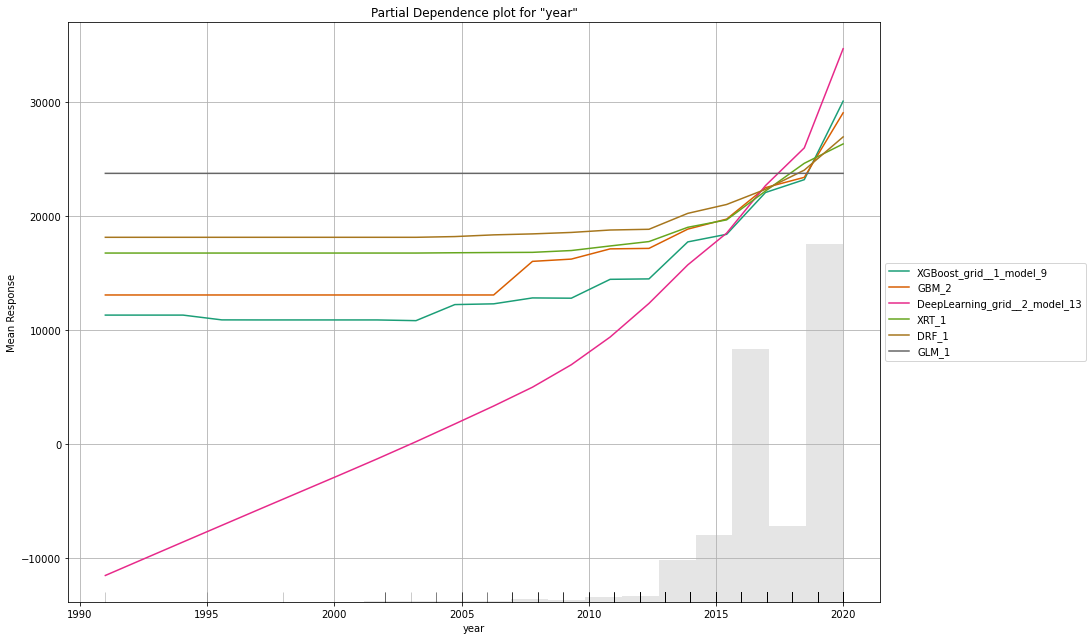

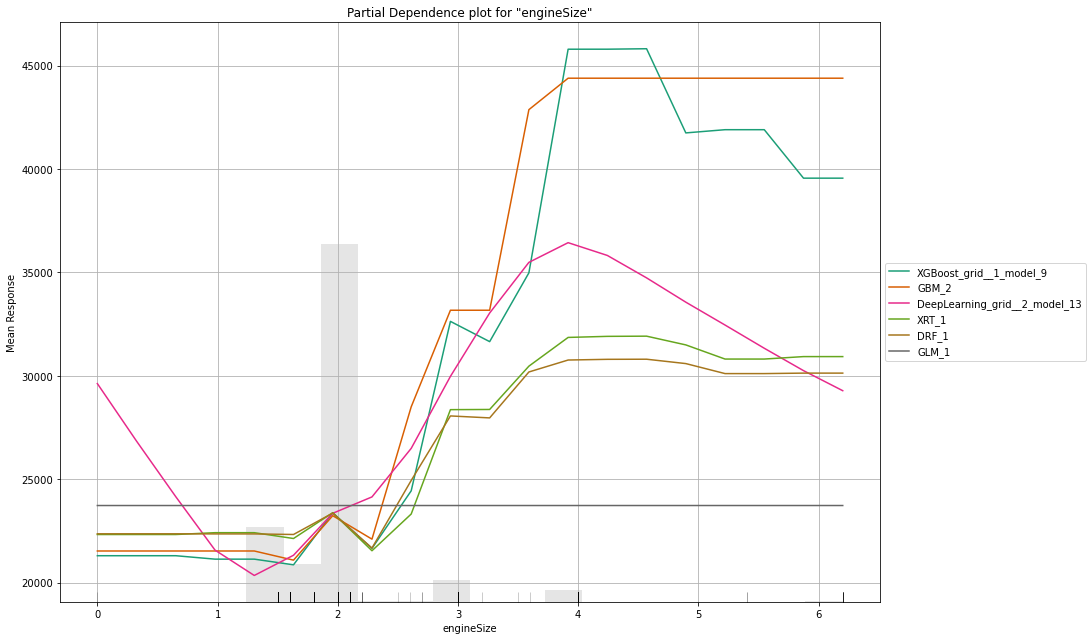

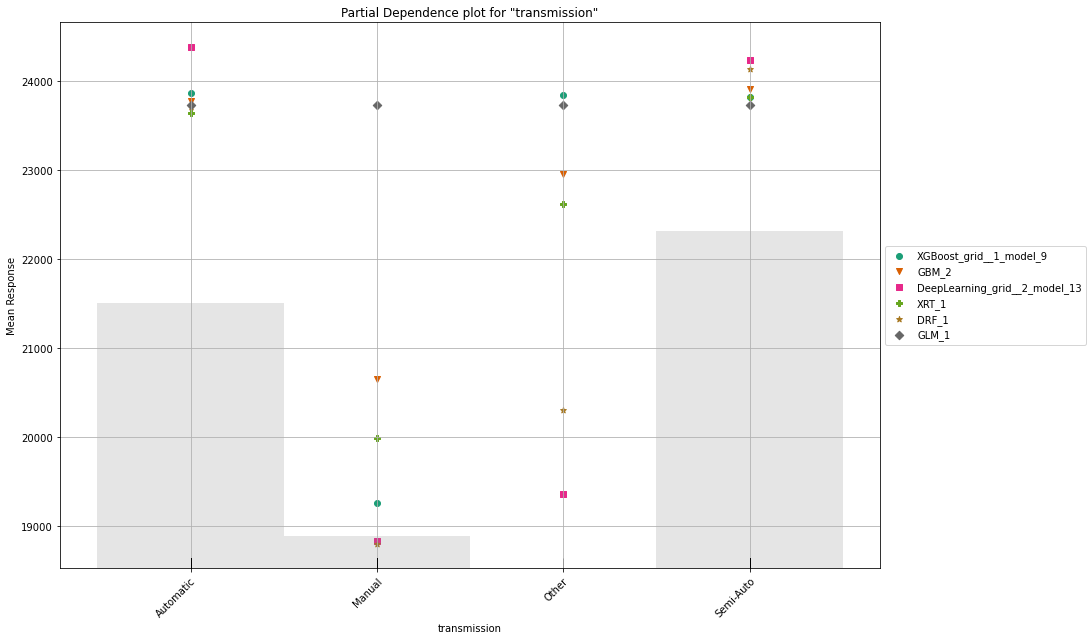

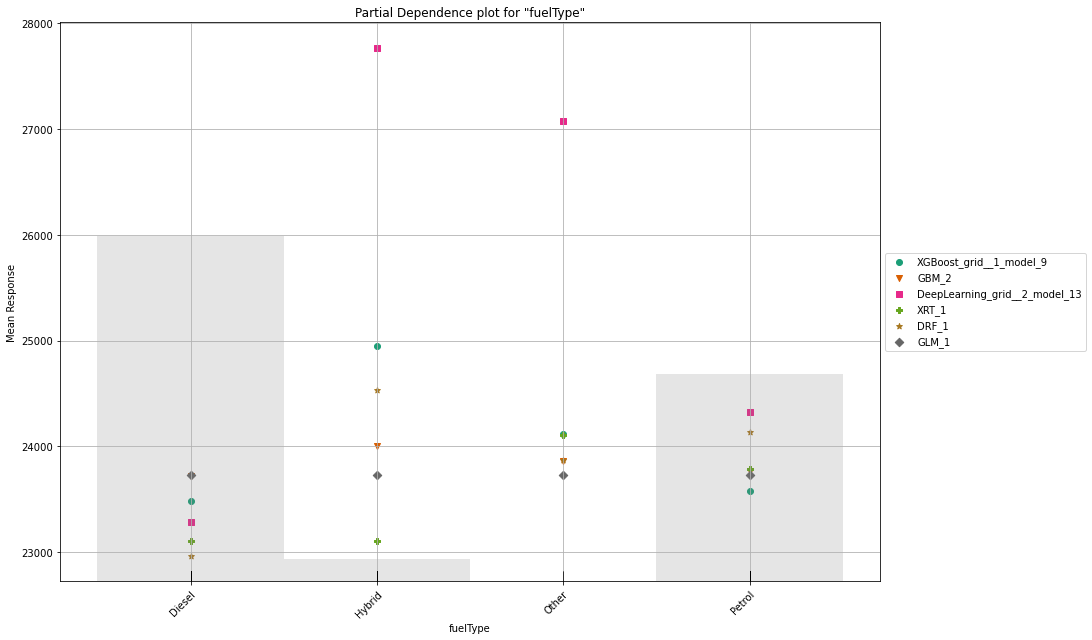

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

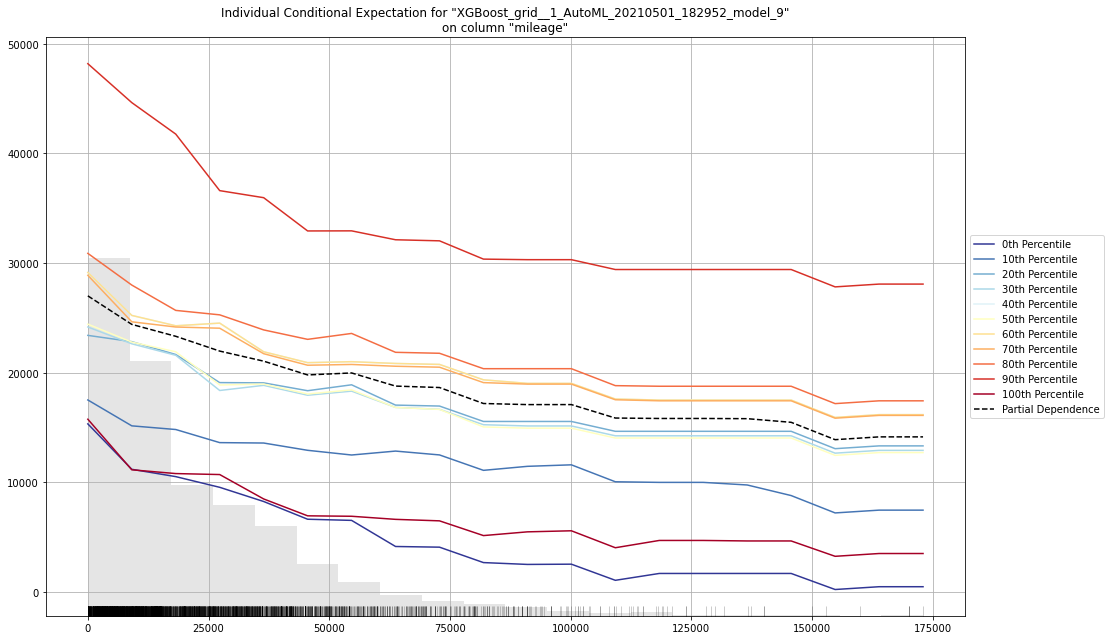

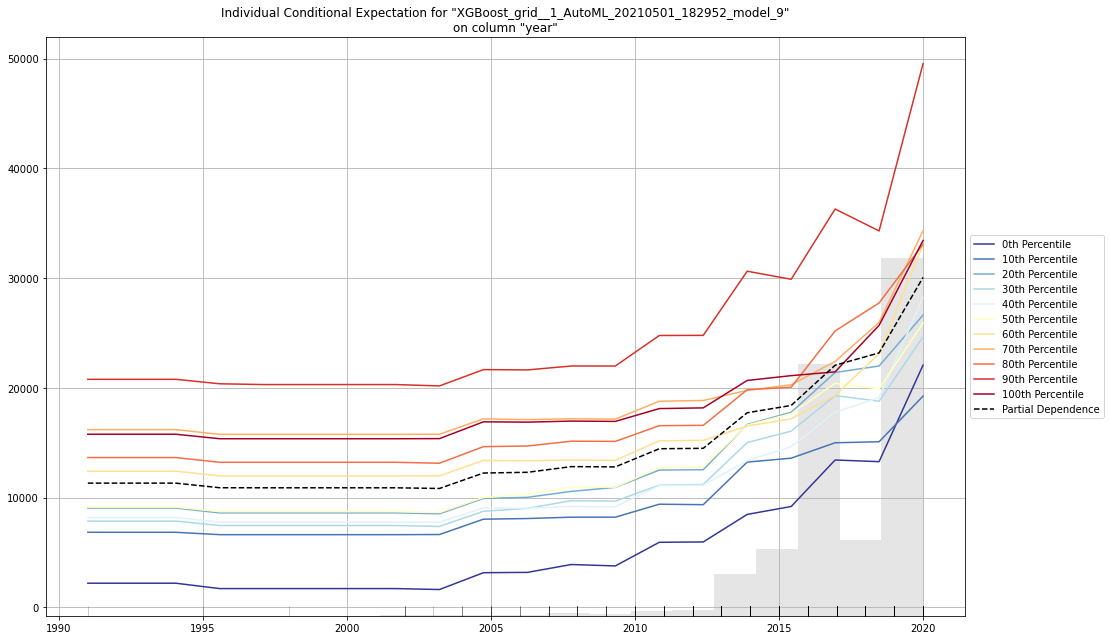

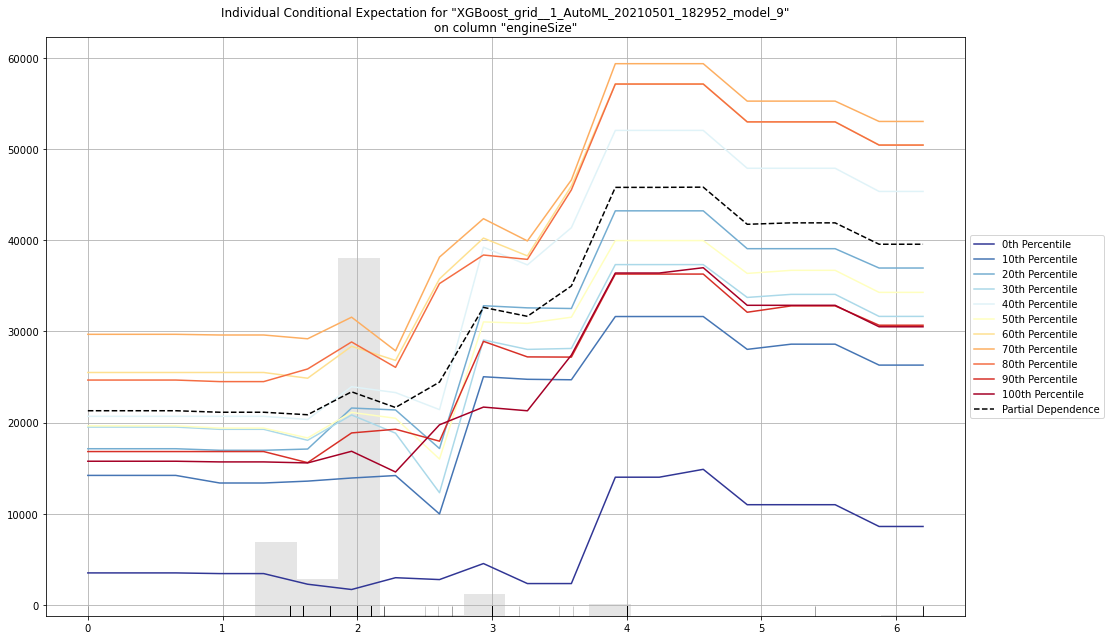

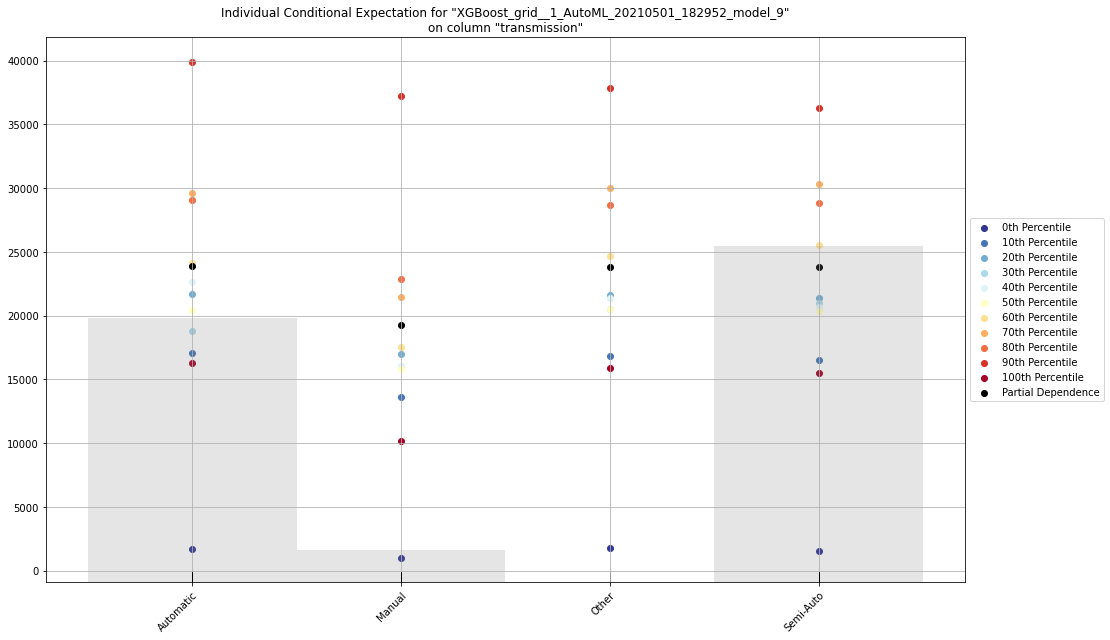

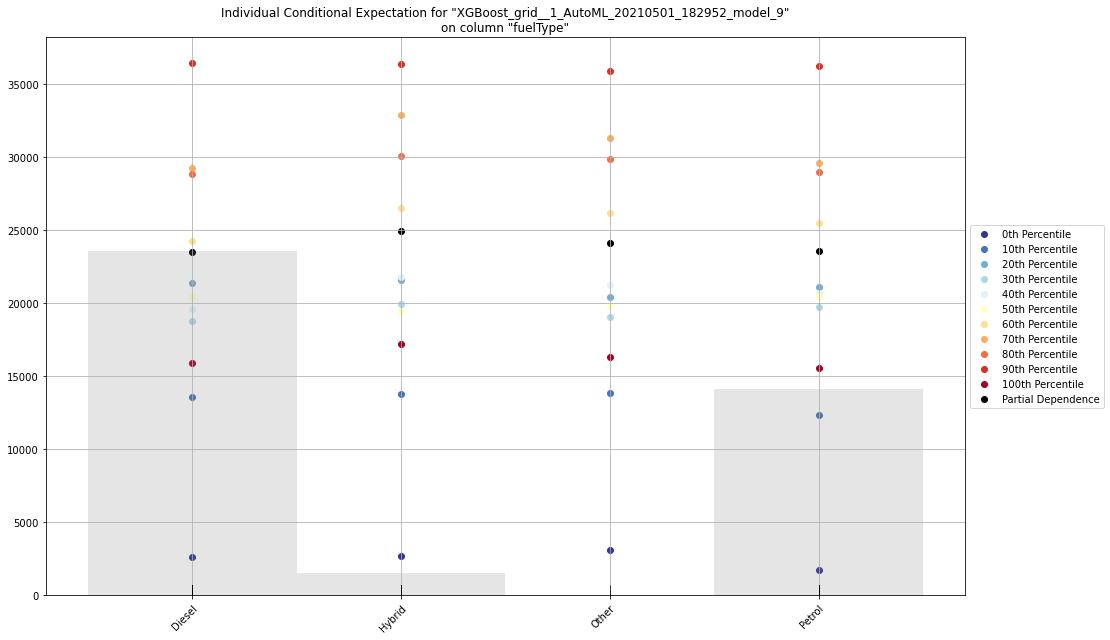

In [29]:
exa = aml.explain(cclass_ds)

In [30]:
# Get the leading pipeline and store it in a variable 
leader= aml.leader 
leader

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid__1_AutoML_20210501_182952_model_9


Model Summary: 


,,number_of_trees
0,,40.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 4422336.28280199
RMSE: 2102.9351589628222
MAE: 1564.977390336732
RMSLE: 0.09129817550303165
Mean Residual Deviance: 4422336.28280199

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 7236832.303882372
RMSE: 2690.1361125196568
MAE: 1997.259624837499
RMSLE: 0.12221735967426323
Mean Residual Deviance: 7236832.303882372

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1997.2462,34.05554,2004.3275,2032.3934,1941.037,1997.2924,2011.1805
1,mean_residual_deviance,7236883.5,470053.8,6876522.5,7436744.5,6726997.0,7910680.5,7233473.0
2,mse,7236883.5,470053.8,6876522.5,7436744.5,6726997.0,7910680.5,7233473.0
3,r2,0.90727234,0.009813916,0.895623,0.9007771,0.9127963,0.90661126,0.9205541
4,residual_deviance,7236883.5,470053.8,6876522.5,7436744.5,6726997.0,7910680.5,7233473.0
5,rmse,2689.0205,86.980225,2622.3125,2727.0396,2593.6455,2812.5933,2689.5117
6,rmsle,0.12195779,0.008884765,0.12170861,0.12562981,0.110496946,0.117653474,0.13430008



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2021-05-01 18:30:15,7.869 sec,0.0,25334.555965,23728.112050,6.418397e+08
1,,2021-05-01 18:30:15,7.883 sec,5.0,5605.401293,4374.722069,3.142052e+07
2,,2021-05-01 18:30:15,7.897 sec,10.0,2947.338082,2142.494250,8.686802e+06
3,,2021-05-01 18:30:15,7.918 sec,15.0,2487.835506,1855.022365,6.189326e+06
4,,2021-05-01 18:30:15,7.945 sec,20.0,2328.951840,1743.360793,5.424017e+06
5,,2021-05-01 18:30:15,7.976 sec,25.0,2251.536304,1687.989696,5.069416e+06
6,,2021-05-01 18:30:15,8.013 sec,30.0,2196.189344,1646.920660,4.823248e+06
7,,2021-05-01 18:30:15,8.057 sec,35.0,2166.810770,1618.089296,4.695069e+06
8,,2021-05-01 18:30:15,8.111 sec,40.0,2102.935159,1564.977390,4.422336e+06



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,mileage,1.411144e+11,1.000000,0.378979
1,year,1.300103e+11,0.921311,0.349157
2,engineSize,9.599150e+10,0.680239,0.257796
3,transmission.Manual,2.759260e+09,0.019553,0.007410
4,transmission.Automatic,6.785579e+08,0.004809,0.001822
5,fuelType.Diesel,6.130015e+08,0.004344,0.001646
6,transmission.Semi-Auto,4.832196e+08,0.003424,0.001298
7,fuelType.Petrol,4.000853e+08,0.002835,0.001074
8,fuelType.Hybrid,2.666858e+08,0.001890,0.000716
9,fuelType.Other,3.668900e+07,0.000260,0.000099


In [31]:
# Get the variable importance
leader.varimp(True)

,variable,relative_importance,scaled_importance,percentage
0,mileage,1.411144e+11,1.000000,0.378979
1,year,1.300103e+11,0.921311,0.349157
2,engineSize,9.599150e+10,0.680239,0.257796
3,transmission.Manual,2.759260e+09,0.019553,0.007410
4,transmission.Automatic,6.785579e+08,0.004809,0.001822
5,fuelType.Diesel,6.130015e+08,0.004344,0.001646
6,transmission.Semi-Auto,4.832196e+08,0.003424,0.001298
7,fuelType.Petrol,4.000853e+08,0.002835,0.001074
8,fuelType.Hybrid,2.666858e+08,0.001890,0.000716
9,fuelType.Other,3.668900e+07,0.000260,0.000099


In [19]:
aml.leader.download_mojo(path = "/Users/home/Documents/Downloads/")

'/Users/home/Documents/Downloads/XGBoost_grid__1_AutoML_20210501_170905_model_9.zip'